**Table of contents**<a id='toc0_'></a>    
- [Notes](#toc1_)    
  - [To do](#toc1_1_)    
- [Package instalation](#toc2_)    
- [1. Test No data frame single likelihood](#toc3_)    
- [2. Test without data frame & with multiple likelihood](#toc4_)    
- [3. Test with data frame in likelihood](#toc5_)    
- [4. Indices PB!!!!!!!!!!!!!!!](#toc6_)    
- [5. Model comparaison](#toc7_)    
- [6. Multiple indices](#toc8_)    
- [ 7. Categorical interactions](#toc9_)    
- [ 8. Continuous interactions](#toc10_)    
- [9. Binomial model](#toc11_)    
- [10. Binomial with index](#toc12_)    
- [11. Poisson](#toc13_)    
- [12. This doesn't work due to 'P^' -> need to implement mathematical operation within formulas](#toc14_)    
- [13. Negative binomial (beta is under-estimated)](#toc15_)    
- [14. Multinomial](#toc16_)    
  - [14.1. Categorical models (tfd.multinomial not handle)](#toc16_1_)    
  - [14.2. Multinomial in disguise as Binomial](#toc16_2_)    
  - [14.3. Multinomial in disguise as Poisson](#toc16_3_)    
- [15. Beta binomial (Need implemantation of tf function within formula to add tf.sigmoid)](#toc17_)    
- [16. Zero-inflated outcomes (TODO)](#toc18_)    
- [17. Ordered categorical outcomes (TODO)](#toc19_)    
- [18. Ordered categorical predictors (TODO)](#toc20_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Notes](#toc0_)

- Gpu computation is not always better, it depends of your model size: https://stackoverflow.com/questions/55749899/training-a-simple-model-in-tensorflow-gpu-slower-than-cpu

- Depending on the float precision model outputs may differ.


## <a id='toc1_1_'></a>[To do](#toc0_)
    1.  Allow mathematical operation within formula
    2.  Redo GUI
    3.  Help functions
    4.  Documentation
    5.  Multinomial models to be run with Multinomial distribution
    6.  Multiple likelihoods can have different types: independent models -> independent HMC, dependent priors -> 
    7.  Handle tf function within formula
    8.  Priors can have args and kwargs
    9. posterior need to handle multiple likelihood

Current WIP BetaBinomial, require to handle multiple likelihoods

# <a id='toc2_'></a>[Package instalation](#toc0_)

In [ ]:
try:
  %pip install tensorflow tensorflow_probability pandas numpy arviz seaborn functools matplotlib.pyplot
  %pip install git+https://github.com/BGN-for-ASNA/BI.git
except:
  pass

# 0 . Importation is slow

In [7]:
from main import *

# <a id='toc3_'></a>[1. Test No data frame single likelihood](#toc0_)

In [175]:
from  main import *
formula = dict(main = 'y~Normal(m,s)',
            likelihood = 'm ~  alpha + beta',
            prior1 = 's~Exponential(1)',
            prior2 = 'alpha ~ Normal(0,1)',
            prior3 = 'beta ~ Normal(0,1)')  
self = model(formula= formula, float = 16) 

self.sample()

No indices in main
With LK


{'s': <tf.Tensor: shape=(1,), dtype=float16, numpy=array([0.3008], dtype=float16)>,
 'beta': <tf.Tensor: shape=(1,), dtype=float16, numpy=array([-1.268], dtype=float16)>,
 'alpha': <tf.Tensor: shape=(1,), dtype=float16, numpy=array([1.519], dtype=float16)>,
 'y': <tf.Tensor: shape=(1,), dtype=float16, numpy=array([0.4463], dtype=float16)>}

# <a id='toc4_'></a>[2. Test without data frame & with multiple likelihood](#toc0_)

In [45]:
from  main import *
formula = dict(main = 'y~Normal(m,s)',
            likelihood = 'm ~  alpha + beta',
            prior1 = 's~Exponential(1)',
            prior2 = 'alpha ~ Normal(0,1)',
            prior3 = 'beta ~ Normal(0,1)',
            
            main1 = 'z~Normal(m2,s2)',
            likelihood2 = 'm2 ~ alpha2 + beta2',
            prior4 = 's2~Exponential(1)',
            prior5 = 'alpha2 ~ Normal(0,1)',
            prior6 = 'beta2 ~ Normal(0,1)') 
self = model(formula= formula, float = 16)
self.log_prob(self.sample(10))

No indices in main
With LK
No indices in main
With LK


<tf.Tensor: shape=(10,), dtype=float16, numpy=
array([ -6.914, -12.14 , -13.89 ,  -7.207,  -8.29 ,  -4.023,  -8.2  ,
        -8.945, -14.34 , -15.45 ], dtype=float16)>

# <a id='toc5_'></a>[3. Test with data frame in likelihood](#toc0_)

In [10]:
from  main import *
## Model m4.3
d = pd.read_csv('./data/Howell1.csv', sep=';')
d = d[d.age > 18]
#self.df["weight.per.g"].pipe(lambda x: (x - x.mean()) / x.std())
d.weight = d.weight - d.weight.mean()
d.age = d.age - d.age.mean()
formula = dict(main1 = 'height ~ Normal(mu,sigma)',
            likelihood = 'mu ~ alpha + beta * weight',
            prior1 = 'sigma ~ Uniform(0,50)',
            prior2 = 'alpha ~ Normal(178,20)',
            prior3 = 'beta ~ Normal(0,1)')    

self = model(formula, df = d, float = 32)
print('tensor DICT:')
print(self.tensor_dict)
print('tensor likelihoods:')
print(self.main_text)
self.fit(observed_data = dict(height =d.height.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

# expected 
#           Mean    StdDev  5.5%    94.5%   a   b   sigma
#   a       154.60  0.27    154.17  155.03  1   0   0
#   b       0.91    0.04    0.84    0.97    0   1   0
#   sigma   5.07    0.19    4.77    5.38    0   0   1

No indices in main
With LK
tensor DICT:
{'sigma': <tfp.distributions.Sample 'Sampleprior1' batch_shape=[] event_shape=[1] dtype=float32>, 'alpha': <tfp.distributions.Sample 'Sampleprior2' batch_shape=[] event_shape=[1] dtype=float32>, 'beta': <tfp.distributions.Sample 'Sampleprior3' batch_shape=[] event_shape=[1] dtype=float32>, 'height': <function <lambda> at 0x0000022F507CBF60>}
tensor likelihoods:
{'height': 'lambda alpha,beta,sigma, : tfd.Independent(tfd.Normal(alpha+beta*df.weight.values,sigma,), reinterpreted_batch_ndims=1)'}


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],5.15,0.20,4.83,5.46
beta[0],0.91,0.04,0.84,0.97
alpha[0],154.65,0.28,154.21,155.09


# <a id='toc6_'></a>[4. Indices](#toc0_)

In [46]:
## Model m5.9 
from  main import *
self = model()
self.import_csv('./data/milk.csv', sep = ';')
self.df["K"] = self.df["kcal.per.g"].pipe(lambda x: (x - x.mean()) / x.std())
self.index(cols = "clade")

formula = dict(main = 'K ~ Normal(mu,sigma)',
            likelihood = 'mu ~ alpha[index_clade]',
            prior1 = 'alpha~ Normal(0,0.5)',
            prior2 = 'sigma ~ Exponential(1)') 

self.formula(f = formula)
self.build_model()
print('tensor DICT:')
print(self.tensor_dict)
print('tensor likelihoods:')
print(self.main_text)
self.fit(observed_data = dict(K =self.df.K.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

# Expected:
#                mean	sd	    hdi_5.5%	hdi_94.5%
# ape_alpha	    -0.48	0.27	-0.93	    -0.08
# nwm_alpha	    0.37	0.22	0.03	    0.73
# owm_alpha	    0.65	0.30	0.26	    1.18
# strep_alpha	-0.55	0.29	-1.07	    -0.19
# sigma	        0.83	0.13	0.67	    1.06

d:\OneDrive\Travail\Max Planck\Projects\BI\code\data.py:48: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  self.df.columns = self.df.columns.str.replace('.', '_')


mu ~ alpha[index_clade]
['mu', ['alpha', 'index_clade']]
[0]
{'alpha': 'index_clade'}
mu ~ alpha[index_clade]
['mu', ['alpha', 'index_clade']]
[0]
{'alpha': 'index_clade'}
tensor DICT:
{'alpha': <tfp.distributions.Sample 'Sampleprior1' batch_shape=[] event_shape=[4] dtype=float32>, 'sigma': <tfp.distributions.Sample 'Sampleprior2' batch_shape=[] event_shape=[1] dtype=float32>, 'K': <function <lambda> at 0x0000013517BD2480>}
tensor likelihoods:
{'K': "lambda alpha,sigma, : tfd.Independent(tfd.Normal( tf.squeeze(tf.gather(alpha,tf.cast(df.index_clade.values, dtype=tf.int32), axis = -1)),sigma,name ='main'), reinterpreted_batch_ndims=1)"}


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.90,0.20,0.62,1.20
alpha[0],-0.54,0.32,-0.99,0.08
alpha[1],0.35,0.27,-0.05,0.78
alpha[2],0.42,0.34,-0.25,0.90
alpha[3],-0.46,0.32,-1.03,0.10


In [47]:
self.mains_infos

{'main': {'output': 'K',
  'input': 'K ~ Normal(mu,sigma)',
  'distribution': 'Normal',
  'params': {'args': ['alpha[df.index_clade.values]', 'sigma'], 'kwargs': {}},
  'priors': ['alpha', 'sigma'],
  'with_likelihood': True,
  'multiple_likelihoods': None,
  'with_indices': True,
  'params_in_df': ['index_clade'],
  'params_not_in_df': ['alpha'],
  'likelihood(s)': {'likelihood': {'main_params': {'args': ['alpha[df.index_clade.values]',
      'sigma'],
     'kwargs': {}},
    'formula': 'mu ~ alpha[index_clade]',
    'output': 'mu',
    'params': ['alpha', 'index_clade'],
    'with_indices': True,
    'indices_position': [0],
    'indices_patterns': {'alpha': 'index_clade'},
    'indices_prior': ['alpha'],
    'indices_var': ['index_clade'],
    'params_in_df': ['index_clade'],
    'params_not_in_df': ['alpha']}}}}

# <a id='toc7_'></a>[5. Model comparaison](#toc0_)

In [12]:
from  main import*
# m8.1
m = model()
d = pd.read_csv('./data/rugged.csv', sep = ';')
# make log version of outcome
d['log_gdp'] = np.log(d.rgdppc_2000)
# extract countries with GDP data

# rescale variables
d['log_gdp_std'] = d["log_gdp"].pipe(lambda x: (x / x.mean()) )
d['rugged_std'] = d["rugged"].pipe(lambda x: (x / x.max()) )
d['rugged_std'] - 0.215
d = d.loc[:,['rugged_std','log_gdp_std', 'cont_africa','log_gdp']]
d = d.dropna()
formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a + b* rugged_std ',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_1 = model(formula, d)

m8_1.fit(observed_data = dict(log_gdp_std =d.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_1.summary()

#Expected:
#       mean    sd      5.5%    94.5%
#a      1.00    0.01    0.98    1.0
#b      0.00    0.05    -0.09   0.09
#sigma  0.14    0.01    0.12    0.15


No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.14,0.01,0.13,0.15
b[0],-0.00,0.07,-0.12,0.10
a[0],1.00,0.02,0.98,1.03


In [13]:

d = pd.read_csv('./data/rugged.csv', sep = ';')
d["log_gdp"] = d["rgdppc_2000"].pipe(np.log)

# extract countries with GDP data
dd = d[d["rgdppc_2000"].notnull()].copy()

# rescale variables
dd["log_gdp_std"] = dd.log_gdp / dd.log_gdp.mean()
dd["rugged_std"] = dd.rugged / dd.rugged.max()

dd["cid"] = np.where(dd.cont_africa.values == 1, 0, 1)
dd["cid"]

formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a[cid] + b*rugged_std',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_2= model(formula, dd)
m8_2.fit(observed_data = dict(log_gdp_std =dd.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_2.summary()

#Expected:
#       mean    sd      5.5%    94.5%
#a[1]   0.88    0.02    0.85    0.91
#a[2]   1.05    0.01    1.03    1.07
#b      -0.05   0.05    -0.12   0.03
#sigma  0.11    0.01    0.10    0.1


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.11,0.01,0.10,0.12
b[0],-0.05,0.05,-0.12,0.03
a[0],0.89,0.02,0.86,0.92
a[1],1.06,0.01,1.04,1.08


In [14]:
m8_2.diag_compare({'m8.1': m8_1.trace, 'm8.2': m8_2.trace})
#       rank	elpd_loo	p_loo	    elpd_diff	weight	se	    dse	    warning	    scale
#m8.2	0	    128.021790	3.008224	0.000000	1.0	    0.0	    0.0	    True	    log
#m8.1	1	    95.414886	2.317650	32.606903	0.0	    0.0	    0.0	    True	    log

c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:837: UserWarning: The point-wise LOO is the same with the sum LOO, please double check the Observed RV in your model to make sure it returns element-wise logp.
  warnings.warn(
c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more r

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m8.2,0,127.806709,3.231392,0.000000,1.000000e+00,0.0,0.0,True,log
m8.1,1,95.340485,2.369415,32.466225,6.661338e-16,0.0,0.0,True,log


# <a id='toc8_'></a>[6. Multiple indices](#toc0_)

In [15]:
# m8.3
from main import*
d = pd.read_csv('./data/rugged.csv', sep = ';')
d["log_gdp"] = d["rgdppc_2000"].pipe(np.log)

# extract countries with GDP data
dd = d[d["rgdppc_2000"].notnull()].copy()

# rescale variables
dd["log_gdp_std"] = dd.log_gdp / dd.log_gdp.mean()
dd["rugged_std"] = dd.rugged / dd.rugged.max()

dd["cid"] = np.where(dd.cont_africa.values == 1, 0, 1)
dd["cid"]


formula = dict(
    main = 'log_gdp_std ~ Normal( mu , sigma ) ',
    likelihood = 'mu ~ a[cid] + b[cid]*rugged_std',
    prior1 = 'a ~ Normal( 1 , 0.1  )' ,
    prior2 = 'b ~ Normal( 0 , 0.3 )' ,
    prior3 = 'sigma ~ Exponential( 1 )'
)

m8_3= model(formula, dd)
m8_3.fit(observed_data = dict(log_gdp_std =dd.log_gdp_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_3.summary()

# Expected:
#       mean    sd      5.5%    94.5%
#a[1]   0.89    0.02    0.86    0.91
#a[2]   1.05    0.01    1.03    1.07
#b[1]   0.13    0.07    0.01    0.25
#b[2]   -0.14   0.05    -0.23    -0.06
#sigma  0.11    0.01    0.10    0.12

,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.11,0.01,0.10,0.12
b[0],0.12,0.07,-0.00,0.23
b[1],-0.14,0.06,-0.22,-0.04
a[0],0.86,0.02,0.83,0.90
a[1],1.08,0.02,1.05,1.11


# 7. Categorical interactions

In [16]:
from main import*
d = pd.read_csv('./data/tulips.csv', sep = ';')
d["blooms_std"] = d.blooms / d.blooms.max()
d["water_cent"] = d.water - d.water.mean()
d["shade_cent"] = d.shade - d.shade.mean()

formula = dict(
            main = 'blooms_std ~ Normal( mu , sigma ) ',
            likelihood ='mu ~ a + bw*water_cent + bs*shade_cent' ,
            prior1 = 'a ~ Normal( 0.5 , 0.25 ) ',
            prior2 = 'bw ~ Normal( 0 , 0.25 ) ',
            prior3 = 'bs ~ Normal( 0 , 0.25 ) ',
            prior4 = 'sigma ~ Exponential( 1 )',
            )
m8_4 = model(formula, d)
m8_4.fit(observed_data = dict(blooms_std =d.blooms_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_4.summary()
#Expected:
#       mean   sd       5.5%    94.5%
#a      0.36    0.03     0.31    0.41
#bw     0.21    0.04     0.15    0.26
#bs    -0.11    0.04    -0.17   -0.05
#sigma  0.16    0.02     0.12    0.19

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.18,0.03,0.13,0.22
bw[0],0.20,0.04,0.14,0.27
bs[0],-0.11,0.04,-0.18,-0.05
a[0],0.36,0.03,0.31,0.42


# <a id='toc10_'></a>[ 8. Continuous interactions](#toc0_)

In [17]:
## Model m8.3
d = pd.read_csv('./data/tulips.csv', sep = ';')
d["blooms_std"] = d.blooms / d.blooms.max()
d["water_cent"] = d.water - d.water.mean()
d["shade_cent"] = d.shade - d.shade.mean()

formula = dict(
            main = 'blooms_std ~ Normal( mu , sigma ) ',
            likelihood ='mu ~ a + bw*water_cent + bs*shade_cent + bws*water_cent*shade_cent' ,
            prior1 = 'a ~ Normal( 0.5 , 0.25 ) ',
            prior2 = 'bw ~ Normal( 0 , 0.25 ) ',
            prior3 = 'bs ~ Normal( 0 , 0.25 ) ',
            prior4 = 'bws ~ Normal( 0 , 0.25 ) ',
            prior5 = 'sigma ~ Exponential( 1 )',
            )
m8_5 = model(formula, d)
m8_5.fit(observed_data = dict(blooms_std =d.blooms_std.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m8_5.summary()

# Expected
#       mean   sd  5.5% 94.5%
#a      0.36 0.02  0.32  0.40
#bw     0.21 0.03  0.16  0.25
#bs    -0.11 0.03 -0.16 -0.07
#bws   -0.14 0.04 -0.20 -0.09
#sigma  0.12 0.02  0.10  0.15

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
sigma[0],0.14,0.02,0.11,0.18
bws[0],-0.14,0.04,-0.20,-0.07
bw[0],0.21,0.03,0.15,0.26
bs[0],-0.11,0.03,-0.16,-0.06
a[0],0.36,0.03,0.32,0.41


# <a id='toc11_'></a>[9. Binomial model](#toc0_)

In [18]:
from main import*
d = pd.read_csv('./data/chimpanzees.csv', sep = ';')
d["treatment"] = 1 + d.prosoc_left + 2 * d.condition
d["side"] = d.prosoc_left  # right 0, left 1
d["cond"] = d.condition  # no partner 0, partner 1

d_aggregated = (
    d.groupby(["treatment", "actor", "side", "cond"])["pulled_left"].sum().reset_index()
)
d_aggregated.rename(columns={"pulled_left": "left_pulls"}, inplace=True)
d_aggregated["actor_id"] = d_aggregated["actor"].values - 1

formula = dict(
    main = 'pulled_left ~ Binomial( 1 , logits = p )' ,
    likelihood = 'p ~ a' ,
    prior1 = 'a ~ Normal( 0 , 10 )'
)

m11_1 = model(formula, d)
m11_1.fit(observed_data = dict(pulled_left =d.pulled_left.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_1.summary()


# expected
#  mean   sd 5.5% 94.5%
#a 0.32 0.09 0.18  0.46

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
a[0],0.32,0.09,0.18,0.47


# <a id='toc12_'></a>[10. Binomial with index](#toc0_)

In [19]:
from main import*
d = pd.read_csv('./data/chimpanzees.csv', sep = ';')
d.actor = d.actor - 1
d["treatment"] = d.prosoc_left + 2 * d.condition
d[["actor", "prosoc_left", "condition", "treatment"]]

formula = dict(
    main = 'pulled_left ~ Binomial(1 , p )' ,
    likelihood = 'p ~ a[actor] + b[treatment]' ,
    prior1 = 'a ~ Normal(0,1.5)',
    prior2 = 'b ~ Normal(0,0.5)'
)
m11_4 = model(formula, d, float = 32)
m11_4.fit(observed_data = dict(pulled_left =d.pulled_left.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_4.summary()
# Expected
#          mean    sd   5.5%    94.5%   n_eff Rhat
#a[1]   -0.45    0.32   -0.95    0.04   690 1
#a[2]   3.86     0.73   2.78     5.09   1417 1
#a[3]   -0.75    0.33   -1.28    -0.23   765 1
#a[4]   -0.74    0.33   -1.26    -0.21   887 1
#a[5]   -0.44    0.32   -0.94    0.10   743 1
#a[6]   0.48     0.32   -0.02    1.00   894 1
#a[7]   1.95     0.40   1.32    2.63    882 1
#b[1]   -0.04    0.28   -0.51    0.40   669 1
#b[2]   0.48     0.28   0.04    0.92    675 1
#b[3]   -0.38    0.28   -0.83    0.06    768 1
#b[4]   0.37     0.27   -0.07    0.79   666 1


,mean,sd,hdi_5.5%,hdi_94.5%
b[0],-0.04,0.29,-0.49,0.43
b[1],0.50,0.29,0.05,0.96
b[2],-0.38,0.29,-0.84,0.08
b[3],0.37,0.29,-0.09,0.82
a[0],-0.46,0.33,-0.98,0.06
a[1],3.90,0.76,2.68,5.07
a[2],-0.76,0.34,-1.28,-0.23
a[3],-0.76,0.34,-1.30,-0.25
a[4],-0.45,0.33,-0.99,0.05
a[5],0.47,0.34,-0.07,1.00


array([<AxesSubplot: >, <AxesSubplot: title={'center': 'ess'}>],
      dtype=object)

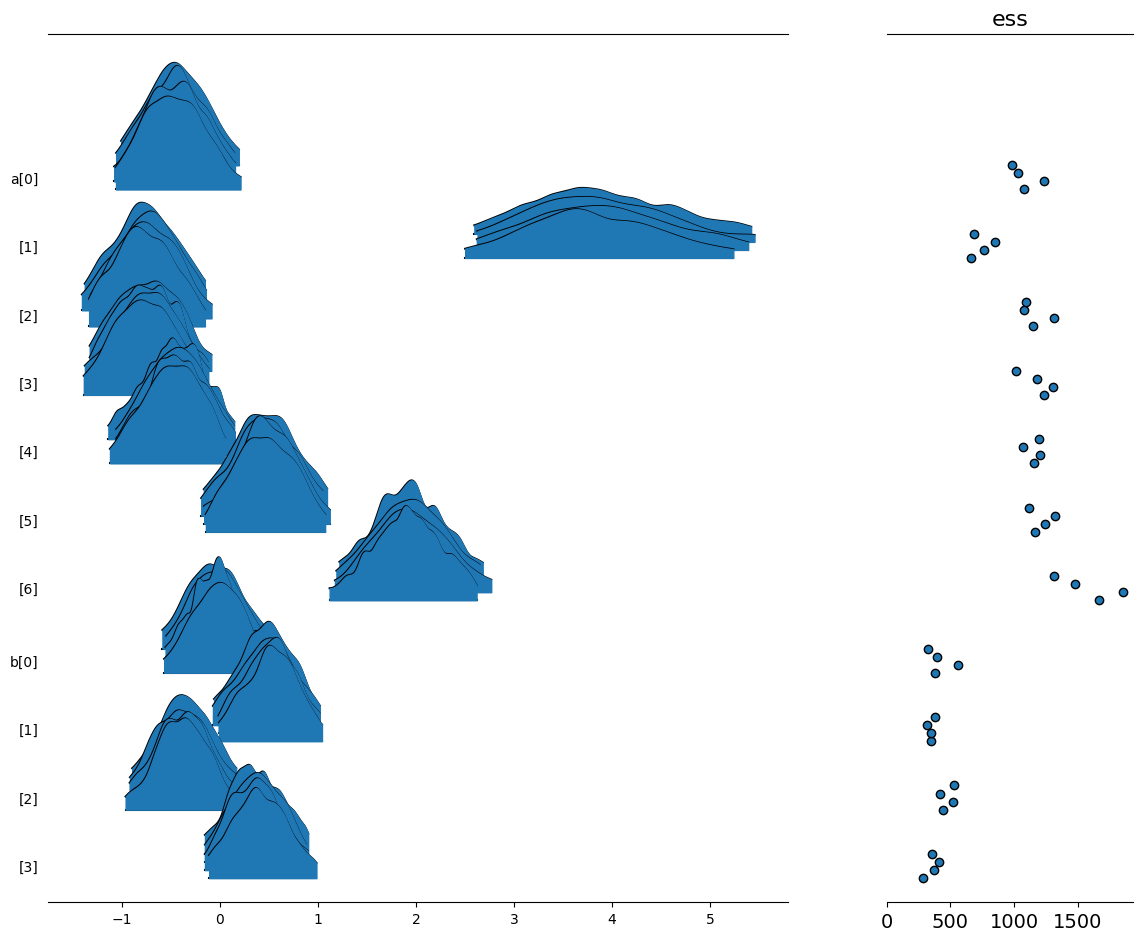

In [20]:
m11_4.diag_forest()

# <a id='toc13_'></a>[11. Poisson](#toc0_)

In [21]:
from main import*
d = pd.read_csv('./data/Kline.csv', sep = ';')
d["P"] = d.population.pipe(np.log).pipe(lambda x: (x - x.mean()) / x.std())
d["cid"] = (d.contact == "high").astype(int)
d['pLog'] = tf.math.log(d.P).numpy()
formula = dict(main = 'total_tools ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ alpha',
               prior1 = 'alpha ~ Normal(3,0.5)')
m11_9 = model(formula, d)
m11_9.fit(observed_data = dict(total_tools =d.total_tools.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_9.summary()
#Expected
#  mean   sd 5.5% 94.5% rhat ess_bulk
#a 3.54 0.05 3.46  3.63 1.01   679.05

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
alpha[0],3.54,0.05,3.46,3.62


In [22]:
formula = dict(main = 'total_tools ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ alpha[cid] + beta[cid]*P',
               prior1 = 'alpha ~ Normal(3,0.5)',
               prior2 = 'beta ~ Normal(0,0.2)')
m11_10 = model(formula, d)
m11_10.fit(observed_data = dict(total_tools =d.total_tools.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_10.summary()
# Expected
#     mean   sd     5.5%    94.5% rhat ess_bulk
#a[1] 3.32  0.09     3.19   3.46    1  1553.42
#a[2] 3.61  0.07     3.49   3.73    1  2004.06
#b[1] 0.38  0.05     0.29   0.46    1  1769.96
#b[2] 0.18  0.16    -0.07   0.45    1  1747.86

,mean,sd,hdi_5.5%,hdi_94.5%
beta[0],0.38,0.05,0.28,0.46
beta[1],0.19,0.16,-0.05,0.45
alpha[0],3.32,0.09,3.18,3.45
alpha[1],3.61,0.07,3.49,3.73


In [23]:
m11_9.diag_compare({'m11_9': m11_9.trace, 'm11_10': m11_10.trace})

c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:837: UserWarning: The point-wise LOO is the same with the sum LOO, please double check the Observed RV in your model to make sure it returns element-wise logp.
  warnings.warn(
c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\arviz\stats\stats.py:837: UserWarning: The point-wise LOO is the same with the sum LOO, please double check the Observed RV in your model to make sure it returns eleme

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m11_10,0,-42.647663,2.659081,0.000000,1.0,0.0,0.0,True,log
m11_9,1,-67.471481,0.599899,24.823818,0.0,0.0,0.0,False,log


# <a id='toc14_'></a>[12. This doesn't work due to 'P^' WIP: need to implement mathematical operation within formulas](#toc0_)

In [24]:
from main import*
d = pd.read_csv('./data/Kline.csv', sep = ';')
d["P"] = d.population.pipe(np.log).pipe(lambda x: (x - x.mean()) / x.std())
d["cid"] = (d.contact == "high").astype(int)
d['pLog'] = tf.math.log(d.P).numpy()
formula = dict(main = 'total_tools ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ alpha[cid] +  P^beta[cid]',
               prior1 = 'alpha ~ Normal(3.,0.5)',
               prior2 = 'beta ~ Normal(0,0.2)')
m11_11 = model(formula, d)
m11_11.tensor_dict
m11_11.main_text

{'total_tools': "lambda alpha,beta, : tfd.Independent(tfd.Poisson(log_rate =  tf.squeeze(tf.gather(alpha,tf.cast(df.cid.values, dtype=tf.int32), axis = -1))+df.P.values^ tf.squeeze(tf.gather(beta,tf.cast(df.cid.values, dtype=tf.int32), axis = -1)),name ='main'), reinterpreted_batch_ndims=1)"}

# <a id='toc15_'></a>[13. Negative binomial (PB estimation)](#toc0_)

In [25]:
from main import*
num_days = 30
y = tfd.Poisson(rate=1.5).sample((num_days,))
num_weeks = 4
y_new = tfd.Poisson(rate=0.5 * 7).sample((num_weeks,))
y_all = np.concatenate([y, y_new])
exposure = np.concatenate([np.repeat(1, 30), np.repeat(7, 4)])
monastery = np.concatenate([np.repeat(0, 30), np.repeat(1, 4)])
d = pd.DataFrame.from_dict(dict(y=y_all, days=exposure, monastery=monastery))
d["log_days"] = d.days.pipe(np.log)
# Select columns with 'float64' dtype  
float64_cols = list(d.select_dtypes(include='float64'))

# The same code again calling the columns
d[float64_cols] = d[float64_cols].astype('float32')


formula = dict(main = 'y ~ Poisson(log_rate = lambda)',
               likelihood = 'lambda ~ log_days + alpha +  beta * monastery',
               prior1 = 'alpha ~ Normal(0,1)',
               prior2 = 'beta ~ Normal(0,1)')
m11_12 = model(formula, d, float=32)
m11_12.fit(observed_data = dict(y =d.y.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_12.summary()
# Expected
#   mean    sd      5.5%    94.5%
#a  0.37    0.15     0.13    0.61
#b -1.13    0.30    -1.61   -0.65

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
beta[0],-1.08,0.31,-1.58,-0.59
alpha[0],0.11,0.17,-0.17,0.38


# <a id='toc16_'></a>[14. Multinomial](#toc0_)

## <a id='toc16_1_'></a>[14.1. Categorical models (WIP: tfd.multinomial to handle)](#toc0_)

In [26]:
from main import*
# simulate career choices among 500 individuals
N = 500  # number of individuals
income = np.array([1, 2, 5])  # expected income of each career
score = 0.5 * income  # scores for each career, based on income

# next line converts scores to probabilities
p = tf.nn.softmax(score)

# now simulate choice
# outcome career holds event type values, not counts
career = np.repeat(np.nan, N)  # empty vector of choices for each individual

# sample chosen career for each individual
for i in range(N):
    career[i] = tfd.Categorical(probs=p).sample()

career = career.astype(int)
result = [income[index] for index in career]
data = {'career': career, 'income': result}
df = pd.DataFrame(data)
df

,career,income
0,1,2
1,2,5
2,2,5
3,2,5
4,2,5
...,...,...
495,2,5
496,2,5
497,2,5
498,2,5


How to programatically determine this model?

In [27]:
def test(N, K = 3, formula = 'alpha + beta*income'):
    def _generator():
        alpha = yield tfd.Sample(tfd.Normal(0,1), sample_shape = (K - 1))
        beta = yield tfd.Sample(tfd.Normal(0,1), sample_shape = 1)
        Class1 =  tf.gather(alpha, [0], axis=-1) + beta * income[0]
        Class2 =  tf.gather(alpha, [1], axis=-1) + beta *income[1]
        Class3 = tf.zeros_like(Class1)  # pivot
        stack = tf.stack([Class1, Class2, Class3], axis=1)
        p =  tf.nn.softmax(stack)
        career =  yield tfd.Independent(tfd.Categorical(probs = p), reinterpreted_batch_ndims=1)
    return tfd.JointDistributionCoroutine(_generator, validate_args=True)

## <a id='toc16_2_'></a>[14.2. Multinomial in disguise as Binomial](#toc0_)

In [28]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')

formula = dict(main = "y ~ Binomial(applications, logits = lambda)",
               likelihood = 'lambda ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)')
m11_14 = model(formula, d, float=32)

m11_14.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m11_14.summary()

No indices in main
With LK


,mean,sd,hdi_5.5%,hdi_94.5%
alpha[0],-0.46,0.03,-0.51,-0.41


In [29]:
m11_14.invt_logit(np.mean(m11_14.posterior['alpha']))
# Expected 0.38

0.3878998597684763

## <a id='toc16_3_'></a>[14.3. Multinomial in disguise as Poisson (since 14/02/2024 this doesn't return expected value)](#toc0_)

We can run N independent poisson models (one for each class) and compute there probability using the posteriors fo each models

In [30]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
formula = dict(main = 'y ~ Poisson(log_rate=lambda1)',
               likelihood = 'lambda1 ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)'
               )
m11_14 = model(formula, d)
m11_14.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
formula = dict(main = 'y ~ Poisson(log_rate=lambda1)',
               likelihood = 'lambda1 ~ alpha',
               prior1 = 'alpha ~ Normal(0.,1.5)'
               )
m11_14_2 = model(formula, d)
m11_14_2.fit(observed_data = dict(y =d.reject.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)

No indices in main
With LK


No indices in main
With LK


In [31]:
a1 = tf.reduce_mean(m11_14.posterior["alpha"][0], 0)
a2 = tf.reduce_mean(m11_14_2.posterior["alpha"][0], 0)
tf.exp(a1) / (tf.exp(a1) + tf.exp(a2))
# Expected 0.38

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.39070794], dtype=float32)>

# <a id='toc17_'></a>[15. Beta binomial](#toc0_)

## 15.1. WIP: Need to implemantation of tf function within formula to add tf.sigmoid



## 15.2. WIP: Need to include other params in traces

In [ ]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
d["gid"] = (d["applicant.gender"] != "male").astype(int)
len(d.applications)
formula = dict(main = 'y ~ BetaBinomial(12, concentration1 = pbar, concentration0 = theta)',
               likelihood = 'pbar ~ sigmoid(a[gid])',
               likelihood2 = 'theta ~ phi + -2.0',
               prior1 = 'a ~ Normal(0.,1.5)',
               prior2 = 'phi ~ Exponential(1)'
               )

m12_1 = model(formula, d)
m12_1.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
m12_1.summary()
# Expected
#       mean   sd  5.5% 94.5% rhat ess_bulk
#a[1]  -0.45 0.41 -1.11  0.19    1  1149.68
#a[2]  -0.33 0.42 -1.01  0.32    1  1200.94
#phi    1.01 0.79  0.09  2.47    1   936.25
#theta  3.01 0.79  2.09  4.47    1   936.28

# <a id='toc18_'></a>[16. Zero-inflated outcomes (TODO)](#toc0_)


## 16.1. Using ZeroInflatedNegativeBinomial function

In [33]:
from main import*
# Define parameters
prob_drink = 0.2  # 20% of days
rate_work = 1     # average 1 manuscript per day

# sample one year of production
N = 365

np.random.seed(365)
drink = np.random.binomial(1, prob_drink, N)
y = (1 - drink) * np.random.poisson(rate_work, N)

formula = dict(main = 'y ~ ZeroInflatedNegativeBinomial(inflated_loc_logits = p, inflated_loc_probs = l)',
               likelihood = "p ~ logits",
               prior1 = 'logits ~ NegativeBinomial(1 , 1)',
               prior2 = 'l ~ Normal(0.,1.5)'
               )

m12_3 = model()
m12_3 = model(formula)
m12_3.tensor

No indices in main
With LK


TypeError: missing a required argument: 'total_count'

## 16.2. Using Inflated function

In [34]:
from main import *
formula = dict(main = 'y ~ Inflated(distribution = P, inflated_loc_probs = L)',
               prior1 = 'P ~ NegativeBinomial(5. , 0.1)',
               prior2 = 'L ~ Normal(0.,1.5)')
m12_3 = model()
self = m12_3
self.f = formula
self.get_var()
self.get_priors_names()
self.get_model_type()
self.get_undeclared_params()
self.get_mains_info() 
print(self.mains_infos)

self.tensor_prior()
self.write_main_text()
for key in self.main_text.keys():
    self.tensor[key] = self.create_function_from_string(func_str = self.main_text[key], name = key)
self.tensor_dict = self.tensor
print(self.tensor_dict)
print(self.main_text)


{'main': {'output': 'y', 'input': 'y ~ Inflated(distribution = P, inflated_loc_probs = L)', 'distribution': 'Inflated', 'params': {'args': [], 'kwargs': {'distribution': 'P', 'inflated_loc_probs': 'L'}}, 'priors': ['L', 'P'], 'with_likelihood': None, 'multiple_likelihoods': None, 'with_indices': False, 'params_in_df': None, 'params_not_in_df': None, 'likelihood(s)': {}}}
No indices in main
Without LK
{'P': <tfp.distributions.Sample 'Sampleprior1' batch_shape=[] event_shape=[1] dtype=float32>, 'L': <tfp.distributions.Sample 'Sampleprior2' batch_shape=[] event_shape=[1] dtype=float32>, 'y': <function <lambda> at 0x0000022F7C82EE80>}
{'y': 'lambda L,P, : tfd.Independent(tfd.Inflated(distribution = P,inflated_loc_probs = L), reinterpreted_batch_ndims=1)'}


In [35]:
self.tensor = tfd.JointDistributionNamed(self.tensor)
self.tensor

c:\Users\SSosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow_probability\python\distributions\inflated.py:101: UserWarning: You have created an Inflated distribution with Sampleprior1/sample/Reshape:0, which is not discrete. 
  warnings.warn('You have created an Inflated distribution with '


AttributeError: 'SymbolicTensor' object has no attribute 'batch_shape'

# 17. Ordered categorical outcomes (TODO)

# 18. Ordered categorical predictors (TODO)

# 19. Varying Slopes Models

In [36]:
from main import*

In [37]:
# This odesn't work 
tfd.CholeskyLKJ(tf.cast([2.0], dtype = tf.float32),tf.cast([2.0], dtype = tf.float32))
# this does
tfd.CholeskyLKJ(2,2)

<tfp.distributions.CholeskyLKJ 'CholeskyLKJ' batch_shape=[] event_shape=[2, 2] dtype=float32>

In [38]:
tfd.Sample(tfd.CholeskyLKJ(2,2), sample)

NameError: name 'sample' is not defined

In [ ]:
# from https://adamhaber.github.io/post/varying-slopes/
a = 3.5  # average morning wait time
b = -1 # average difference afternoon wait time
sigma_a = 1 # standard deviation in the (café-specific) intercepts
sigma_b = 0.5 # standard deviation in the (café-specific) slopes
rho = -0.7 # correlation between intercepts and slopes

mu = [a,b] # the mean of our gaussian distribution
sigmas = [sigma_a,sigma_b] # vector of standard deviations
corr_matrix = np.array([[1,rho], [rho,1]]) # correlation matrix
cov_matrix = np.diag(sigmas)@corr_matrix@np.diag(sigmas) 

n_cafés = 20 # 20 cafés overall

café_params = np.random.multivariate_normal(mu ,cov_matrix,size=n_cafés) 
café_intercept = café_params[:, 0] # intercepts are in the first column
café_slopes = café_params[:, 1] # slopes are in the second

n_visits = 10 # 10 visits per café

afternoon = np.tile([0,1], n_visits * n_cafés//2) # alternate values for mornings and afternoons in the data frame
café_id = np.repeat(np.arange(n_cafés),n_visits) # data for each café are consecutive rows in the data frame

mu = café_intercept[café_id] + café_slopes[café_id] * afternoon # the regression equation for the mean waiting time
sigma = 0.5 # standard deviation of waiting time within cafés
wait = np.random.normal(mu, sigma, n_visits * n_cafés) # generate instances of waiting times
df = pd.DataFrame(dict(café = café_id, afternoon = afternoon, wait = wait))
print(df.sample(10).to_string(index=False))

m = {}
m['chol_rho'] = tfd.CholeskyLKJ(2,2) # No sample for CholeskyLKJ
m['sigma'] = tfd.Sample(tfd.Exponential(rate = 1),sample_shape = 1)
m['sigma_café'] = tfd.Sample(tfd.Exponential(rate = 1),sample_shape = 2)
m['b'] = tfd.Sample(tfd.Normal(loc = -1, scale = 0.5), sample_shape = 1)
m['a'] = tfd.Sample(tfd.Normal(loc = 5, scale = 2), sample_shape = 1)
m['mvn'] = lambda a,b,sigma_café,chol_rho : tfd.Sample( # per-café intercepts and slopes
    tfd.MultivariateNormalTriL(
        loc = tf.concat([a,b],axis=-1),
        scale_tril = tf.linalg.LinearOperatorDiag(sigma_café).matmul(chol_rho)
    ),
    sample_shape=n_cafés
)
m['m2'] = lambda mvn, sigma : tfd.Independent(  #per-café waiting times
            tfd.Normal(
                loc = tf.gather(mvn[:,:,0],café_id,axis=-1) + tf.gather(mvn[:,:,1],café_id,axis=-1)*afternoon,
                scale = sigma
            ),
            reinterpreted_batch_ndims=1
        )

M = tfd.JointDistributionNamed(m)
M.sample()

 café  afternoon     wait
    0          1 1.369102
   10          0 5.231264
   14          0 4.272708
    9          0 1.312913
   10          1 4.317063
    5          0 2.587905
   18          0 2.434638
   10          0 5.688559
   15          1 0.816073
    3          0 5.433286


ValueError: Index out of range using input dim 2; input has only 2 dims for '{{node strided_slice}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=3, ellipsis_mask=0, end_mask=3, new_axis_mask=0, shrink_axis_mask=4](SampleMultivariateNormalTriL/sample/Reshape, strided_slice/stack, strided_slice/stack_1, strided_slice/stack_2)' with input shapes: [20,2], [3], [3], [3] and with computed input tensors: input[3] = <1 1 1>.

# Working on tf function within formula

In [ ]:
from  main import *
formula = dict(main = 'y~Normal(m,s)',
            likelihood = 'm ~  tf.sigmoid(alpha) + beta',
            prior1 = 's~Exponential(1)',
            prior2 = 'alpha ~ Normal(0,1)',
            prior3 = 'beta ~ Normal(0,1)')  
self = model(formula) 
self.sample()
self.main_text

In [188]:
from main import*
d = pd.read_csv('./data/UCBadmit.csv', sep = ';')
d["gid"] = (d["applicant.gender"] != "male").astype(int)
formula = dict(main = 'y ~ BetaBinomial(12, concentration1 = pbar, concentration0 = theta)',
               likelihood = 'pbar ~ sigmoid(a[gid]) + 10',
               likelihood2 = 'theta ~ phi + -2.0',
               prior1 = 'a ~ Normal(0.,1.5)',
               prior2 = 'phi ~ Exponential(1)'
               )

self = model()
self.f = formula
self.df = d


{'main': {'input': 'y ~ BetaBinomial(12, concentration1 = pbar, concentration0 = theta)',
  'output': 'y',
  'formula': 'tfd.BetaBinomial (tf.cast(12.0, dtype = tf.float32),concentration1=pbar,concentration0=theta)',
  'args': ['BetaBinomial',
   '12',
   'concentration1=pbar',
   'concentration0=theta'],
  'likelihood(s)': {},
  'params': {'args': ['BetaBinomial', '12'],
   'kwargs': {'concentration1': 'pbar', 'concentration0': 'theta'}},
  'prior(s)': {}}}

In [ ]:

model_info = {}
model_info["multiple_lks"] = False
model_info["with_indices"] = False
model_info["indices"] = {}
# Utility functions --------
def convert_to_numeric(self, lst):
    numeric_list = []
    for item in lst:
        try:
            myFloat = "tf.cast(" + str(float(item)) + ", dtype = tf.float" + str(self.float) + ')'
            #myFloat = tf.cast(myFloat, self.float)
            numeric_list.append(myFloat)
        except ValueError:
            try:
                myInt = "tf.cast(" + str(int(item))  + ", dtype = tf.int" + str(self.float) + ')'
                myInt = tf.cast(myInt, self.int)
                numeric_list.append(myInt)
            except ValueError:
                numeric_list.append(item) 
                 # Keep as is if not numeric
    return numeric_list

def unlist(data, remove_chars=[" ", "]"], remove_empty=True):
    """
    Unlists nested lists of strings into a single, flat list, handling any level of nesting.
    Optionally removes empty strings and specified characters.

    Args:
        data: A list containing strings or nested lists of strings.
        remove_chars: A string or a list of characters to remove from each string (default: "").
        remove_empty: Whether to remove empty strings (default: True).

    Returns:
        A single list containing all the strings from the input data,
        with empty strings and specified characters removed if applicable.
    """

    result = []
    for item in data:
        if isinstance(item, list):
            result.extend(unlist(item, remove_chars, remove_empty))  # Recursively unlist nested lists
        else:
            if remove_empty and not item:
                continue  # Skip empty strings

            if remove_chars:
                # Convert a list of characters to a translation table if necessary
                if isinstance(remove_chars, list):
                    remove_chars = str.maketrans('', '', ''.join(remove_chars))

                item = item.translate(remove_chars)  # Remove specified characters

            result.append(item)
    return result

def args_add_df(main):
    if not self.df.empty:
        if len(main['params']['args']) > 0:            
            for b in range(len(main['params']['args'])):
                if any(self.df.columns.str.strip().str.fullmatch(main['params']['args'][b])):
                    main['input'] = main['input'].replace(main['params']['args'][b], "df." + main['params']['args'][b])
                    main['params']['args'][b] = "df." + main['params']['args'][b]                    

        if len(main['params']['kwargs']) > 0:              
            for k in main['params']['kwargs'].keys():
                if any(self.df.columns.str.strip().str.fullmatch(main['params']['kwargs'][k])):
                    main['input'] = main['input'].replace(main['params']['kwargs'][k], "df." + main['params']['kwargs'][k])
                    main['params']['kwargs'][k] = "df" + main['params']['kwargs'][k]

                    
    return main

def split_formula(formula):
    y, x = re.split(r'[~]',formula)
    y = y.replace(" ", "")
    x = x.replace(" ", "")
    return y, x

# Extract informations functions --------
# Not needed
def get_main_infos(key, main, diagnostic = False):
    main[key] = {}
    main[key]['input'] = self.f[key]
    main[key]['output'], main[key]['formula'] = split_formula(main[key]['input'])
    main[key]['args'] = self.get_formula(main[key]['input'], type = 'main')
    main[key]['distribution'] = main[key]['args'][1]
    main[key]['params'] = self.separate_args_kwargs(main[key]['args'][2]) 
    main[key] = args_add_df(main[key])
    model_info["multiple_lks"] = False
    main[key]['likelihood(s)'] = {}
    main[key]['prior(s)'] = {}
    if diagnostic:
        return main  
    else:
        new = {}
        new = {a: main[key][a] for a in ["input", "output", "formula", "args", "likelihood(s)", "params"] if a in main[key]}
        main[key] = new
        return  main        

def get_lk_general_info(key, lk):
    lk[key] = {}
    lk[key]['input'] = self.f[key]

    # Extracting params
    lk[key]['output'], lk[key]['formula'] = split_formula(lk[key]['input'])
    args = re.split(r'[+*()*[*^*-*/*,]',lk[key]['formula'] )
    lk[key]['args'] = unlist(args)

    lk[key]['likelihood(s)'] = {}
    lk[key]['prior(s)'] = {}

    lk[key]['with_tensorflow'] = False
    lk[key]['with_distribution'] = False    
    return lk

def get_lk_params_info(key, lk, diagnostic = False):
    # Evaluate arguments
    for i in range(len(lk[key]['args'])):
        # For the moment we replace tf and tfd functions, but we may also ask user to directly write tf and tfd
        # replace tf function
        if lk[key]['args'][i] in list(tf_classes.keys()): #            
            lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['args'][i], 'tf.' + lk[key]['args'][i] + ' ')
            #lk[key]['args'][i]  = 'tf.' + lk[key]['args'][i]
            lk[key]['with_tensorflow'] = True

        # replace tfd function
        elif lk[key]['args'][i]  in list(tfd_classes.keys()):        
            lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['args'][i], 'tfd.' + lk[key]['args'][i] + ' ')
            #lk[key]['args'][i]  = 'tfd.' + lk[key]['args'][i]
            lk[key]['with_distribution'] = True

        # replace df arguments
        if not self.df.empty:
            if any(self.df.columns.str.strip().str.fullmatch(lk[key]['args'][i])) : #if index
                 lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['args'][i], 'df.' + lk[key]['args'][i] + ' ')
                 #lk[key]['args'][i] = lk[key]['args'][i].replace(lk[key]['args'][i], "df." + lk[key]['args'][i])

    # check for indices        
    lk[key]['with_indices'] = "[" in lk[key]['input'] 
    lk[key]['indices'] = self.extract_indices_patterns(lk[key]['input'])
    lk[key]['formula'] = self.convert_indices(lk[key]['formula'], dtype = self.float)

    lk[key]['params'] = self.separate_args_kwargs(lk[key]['args']) 

    if "[" in lk[key]['input'] :
        model_info["with_indices"] = True 
        model_info["indices"] = lk[key]['indices']

    # Cast numeric (can't be done before, otherwise separate_args_kwargs will concider casts as kwargs )
    if len(lk[key]['params']['args']) > 0:
        for a in range(len(lk[key]['params']['args'])):            
            try:
                tmp = "tf.cast(" + str(float(lk[key]['params']['args'][a])) + ", dtype = tf.float" + str(self.float) + ')'
                lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['params']['args'][a], tmp)
                #lk[key]['params']['args'][a] = tmp
            except ValueError:
                try:
                    tmp = "tf.cast(" + str(int(lk[key]['params']['args'][a]))  + ", dtype = tf.float" + str(self.float) + ')'
                    lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['params']['args'][a], tmp)
                    #lk[key]['params']['args'][a] =  tmp

                except ValueError:
                    lk[key]['params']['args'][a] =  lk[key]['params']['args'][a]

    if len(lk[key]['params']['kwargs']) > 0:
        for k in lk[key]['params']['kwargs'].keys():            
            try:
                tmp = "tf.cast(" + str(float(lk[key]['params']['kwargs'][k])) + ", dtype = tf.float" + str(self.float) + ')'
                lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['params']['kwargs'][k], tmp)
                #lk[key]['params']['kwargs'][k] = tmp
            except ValueError:
                try:
                    tmp = "tf.cast(" + str(int(lk[key]['params']['kwargs'][k]))  + ", dtype = tf.float" + str(self.float) + ')'
                    lk[key]['formula'] = lk[key]['formula'].replace(lk[key]['params']['kwargs'][k], tmp)
                    #lk[key]['params']['kwargs'][k] =  tmp

                except ValueError:
                   lk[key]['params']['kwargs'][k] =  lk[key]['params']['kwargs'][k]
    if diagnostic:
        return lk # return more info for diagnostic
    else:
        new = {}
        new = {a: lk[key][a] for a in ["input", "output", "formula", "args", "likelihood(s)", "params"] if a in lk[key]}
        lk[key] = new
        return  lk        

def get_model_info(diagnostic = False):
    mains = {}
    lks = {}
    priors = {}
    for key in self.f.keys():
        if 'main' in key.lower():
            mains = get_lk_general_info(key, mains)
            mains = get_lk_params_info(key, mains, diagnostic)
            mains[key]["prior(s)"] = {}

        elif 'likelihood' in key.lower():
            lks = get_lk_general_info(key, lks)
            lks = get_lk_params_info(key, lks, diagnostic)
            lks[key]["prior(s)"] = {}

        elif 'prior' in  key.lower():
            priors = get_lk_general_info(key, priors)
            priors = get_lk_params_info(key, priors, diagnostic)
            priors[key]["prior(s)"] = {}

    return mains, lks, priors

mains, lks, priors = get_model_info()

mains

In [189]:
# Merge informations functions --------
def merge_main_lks(mains, lks):         
    # find where lks are 
    for key in lks.keys():
        for i in mains.keys():  
            if len(mains[i]['params']["args"]) > 0:
                for j, item  in  enumerate(mains[i]['params']["args"]):
                    if lks[key]["output"] == item:
                        mains[i]["likelihood(s)"].update(lks[key])
                        mains[i]['params']["args"][j] = lks[key]['formula'] # repalce main arg by lk formula

            if len(mains[i]['params']["kwargs"]) > 0:
                 for k in  mains[i]['params']["kwargs"].keys():
                     if lks[key]["output"] == mains[i]['params']["kwargs"][k]:
                         mains[i]["likelihood(s)"][key] = lks[key]
                         mains[i]['params']["kwargs"][k] = lks[key]['formula']# repalce main kwarg by lk formula

            if len(mains[i]["likelihood(s)"]) > 1:
                 mains[i]["multiple_lks"] = True
                 model_info["multiple_lks"] = True

    return mains

def merge_main_priors(mains,priors):
    # find where lks are 
    for key in priors.keys():
        for i in mains.keys():  
            if len(mains[i]['params']["args"]) > 0:
                for item in  mains[i]['params']["args"]:
                    if priors[key]["output"] == item:
                        mains[i]["prior(s)"][key] = priors[key]

            if len(mains[i]['params']["kwargs"]) > 0:
                 for k in  mains[i]['params']["kwargs"].keys():
                     if priors[key]["output"] == mains[i]['params']["kwargs"][k]:
                         mains[i]["prior(s)"][key] = priors[key]
    return mains

def merge_lks_priors(lks,priors):
    # find where lks are 
    for key in priors.keys():
        for i in lks.keys():  
            if len(lks[i]["args"]) > 0:
                for item in  lks[i]["args"]:
                    if priors[key]["output"] ==  item:
                        lks[i]["prior(s)"][key] = priors[key]
    return lks

def merge_priors_priors(priors):
    # find where lks are 
    for key in priors.keys():
        for i in priors.keys():  
            if len(priors[i]['params']["args"]) > 0:
                for item in  priors[i]['params']["args"]:
                    if priors[key]["output"] == item:
                        priors[i]["prior(s)"][key] = priors[key]

            if len(priors[i]['params']["kwargs"]) > 0:
                 for k in  priors[i]['params']["kwargs"].keys():
                     if priors[key]["output"] == priors[i]['params']["kwargs"][k]:
                         priors[i]["prior(s)"][key] = priors[key]
    return priors

priors = merge_priors_priors(priors) # Priors of priors (need recursive?)
lks = merge_lks_priors(lks, priors) # Priors of likelihoods 
mains = merge_main_lks(mains, lks) # likelihoods of mains 
mains = merge_main_priors(mains, priors) # Priors of mains 

if len(mains) > 1 :
    model_info['multiple_mains'] = True
else:
    model_info['multiple_mains'] = False

if len(lks) > 1 :
    model_info['multiple_lks'] = True
else:
    model_info['multiple_lks'] = False

if len(priors) > 1 :
    model_info['multiple_priors'] = True
else:
    model_info['multiple_priors'] = False

mains

{'main': {'input': 'y ~ BetaBinomial(12, concentration1 = pbar, concentration0 = theta)',
  'output': 'y',
  'formula': 'tfd.BetaBinomial (tf.cast(12.0, dtype = tf.float32),concentration1=pbar,concentration0=theta)',
  'args': ['BetaBinomial',
   '12',
   'concentration1=pbar',
   'concentration0=theta'],
  'likelihood(s)': {'likelihood': {'input': 'pbar ~ sigmoid(a[gid]) + 10',
    'output': 'pbar',
    'formula': 'tf.sigmoid ( tf.squeeze(tf.gather(a,tf.cast(df.gid , dtype=tf.int32), axis = -1)))+tf.cast(10.0, dtype = tf.float32)',
    'args': ['sigmoid', 'a', 'gid', '10'],
    'likelihood(s)': {},
    'params': {'args': ['sigmoid', 'a', 'gid', '10'], 'kwargs': {}},
    'prior(s)': {'prior1': {'input': 'a ~ Normal(0.,1.5)',
      'output': 'a',
      'formula': 'tfd.Normal (tf.cast(0.0, dtype = tf.float32),tf.cast(1.5, dtype = tf.float32))',
      'args': ['Normal', '0.', '1.5'],
      'likelihood(s)': {},
      'params': {'args': ['Normal', '0.', '1.5'], 'kwargs': {}},
      'prior(s

In [243]:
# Priors entries
model_dict = {}
for key in priors.keys():
    # Prior without prior
    if len(priors[key]['prior(s)']) == 0:
        text = "tfd.Sample("
        text = text + priors[key]["formula"] 
        text = text[:-1]
        text = text + """, name = '""" + key + """')"""
        text = text + ", sample_shape = "

        if model_info['with_indices']:
            if priors[key]["output"]  in model_info["indices"].keys():
                shape = self.df[model_info["indices"][priors[key]["output"]]].nunique()
            else:
                shape = 1
        text =  text = text + str(shape) + ")"

    model_dict[priors[key]["output"]] = text   

import ast
# Function to safely evaluate the string expression
def eval_expression(expr):
    # Parse the expression as an abstract syntax tree (AST)
    expr_ast = ast.parse(expr, mode='eval')
    
    # Traverse the AST and evaluate the expression
    expr_value = eval(compile(expr_ast, filename="<ast>", mode="eval"))
    
    return expr_value

# Evaluate the expressions in the dictionary values
model_dict = {key: eval_expression(value) for key, value in model_dict.items()}
model_dict

# Mains entries
main_dict = {}
for key in mains:
    if len(mains[key]) > 0 :
        # Mains distribution 
        text = "lambda "

        #Get main priors
        if len(mains[key]['prior(s)']) > 1 :
            for k in mains[key]['prior(s)'].keys():
                text = text + mains[key]['prior(s)'][k]["output"] + ', '

        # Get main lk priors
        if len(mains[key]['likelihood(s)']) > 0:
            # For each LK
            for a in mains[key]['likelihood(s)'].keys():
                # Check its priors and add them to lambda
                if len(mains[key]['likelihood(s)'][a]['prior(s)']) > 0:
                    for b in mains[key]['likelihood(s)'][a]['prior(s)'].keys():
                        text = text + mains[key]['likelihood(s)'][a]['prior(s)'][b]["output"]  + ', '

        text = text[:-2] + " : tfd.Independent(tfd."+ mains[key]['params']['args'][0] + "(" # First argument is the distribution

        if len(mains[key]['params']['args']) > 0:
            text = text + ", ".join( mains[key]['params']['args'][1:]) + "," # Remove first argument 

        if len(mains[key]['params']['kwargs']) > 0:
            for k, v in mains[key]['params']['kwargs'].items():
                text = text + k + " = " + v + ","
                
        text = text[:-1] +  ', name =' + "'" + str(key) + "'" + "), reinterpreted_batch_ndims=1)"

        main_dict[mains[key]["output"]] = text
main_dict

for key in main_dict.keys():
        model_dict[key] = self.create_function_from_string(func_str = main_dict[key], name = key)
model_dict

self.tensor = tfd.JointDistributionNamed(model_dict)
self.priors = list(priors.keys())

In [245]:
self.fit(observed_data = dict(y =d.admit.astype('float32').values),
                                           num_results = 2000, num_burnin_steps=500, num_adaptation_steps=400, num_chains=4)
self.summary()

,mean,sd,hdi_5.5%,hdi_94.5%
phi[0],0.76,0.42,0.29,1.32
a[0],-0.24,1.43,-2.28,1.75
a[1],1.01,0.50,0.39,1.71
